### Task 1 - Regresión lineal polinómica

#### Instrucciones: Usted usará Python a través de un Jupyter Notebook para llevar a cabo este ejercicio. Recuerde utilizar comentarios para describir lo que está haciendo en cada parte del proceso. Estará usando el juego de datos proporcionado dentro del portal. Al finalizar recuerde subir al portal un link a su repositorio en el que se pueda correr su notebook, usando https://mybinder.org/. El juego de datos proporcionado es parte de la plataforma Kaggle, dentro del cual se muestran los precios de casas en King County, Seattle. Este juego de datos incluye los precios de las casas vendidas entre mayo 2014 y mayo 2015. Nótese que el precio es dependiente de varias características como el número de habitaciones, número de baños, metros cuadrados de la sala, pisos, etc.

### Task 1.1 - Leer el archivo CSV proporcionado (kc_house_data.csv dentro de lab4_dataset.zip) y almacenarlo en un p.array para ser trabajado en el notebook.

In [46]:
#Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

# leer el archivo CSV
data = np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=True)

data = np.array(data)

# imprimir la forma (shape) del arreglo
data

array([[         nan,          nan,  2.21900e+05, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [         nan,          nan,  5.38000e+05, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [         nan,          nan,  1.80000e+05, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [         nan,          nan,  4.02101e+05, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [         nan,          nan,  4.00000e+05, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [         nan,          nan,  3.25000e+05, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [47]:
#Mostramos el tamaño que tiene dicho array
data.size

453873

In [48]:
#Analizamos el shape del array
data.shape

(21613, 21)

In [49]:
#Imprimimos la cantidad de dimensiones que tiene el array
data.ndim

2

In [50]:
#Limpiamos los datos

#Empezamos quitando los Nan que se encuentran en dicho array
data = data[~np.isnan(data[:,2])]
data = data[~np.isnan(data[:,5])]

### Task 1.2 - Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

In [51]:
#Aplicamos el código visto en clase
norm = lambda v: (sum(v**2))**0.5
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

def linear_regression(X, y, t, cost, grad, a=0.1, n=1000, on_step=None): 
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))
        if on_step:
            on_step(t)
    return t, costs

def gradient_descent(theta, X, y, linear_cost, linear_cost_gradient, learning_rate=0.01, threshold=0.001, max_iter=10000, grad=1):
    X = X ** grad
    tempTheta = theta
    i = 0
    costs, norms = [], []
    while np.linalg.norm(linear_cost_gradient(tempTheta, X, y, 0.1)) > threshold and i < max_iter:
        tempTheta -= learning_rate * linear_cost_gradient(tempTheta, X, y, 0.1)
        i += 1
        costs.append(linear_cost(tempTheta, X, y, 0.1))
        norms.append(tempTheta.copy())

    return tempTheta, costs, norms

def linear_cost(theta, X, y, lmbd):
    h = X @ theta
    reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()
    return ((h - y) ** 2).sum() / (2 * len(X)) + reg

def linear_cost_gradient(theta, X, y, lamb):
    h = X @ theta + 0
    theta_copy = theta.copy()
    theta_copy[0] = 0
    return ((X.T @ (h - y)) / len(X))

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


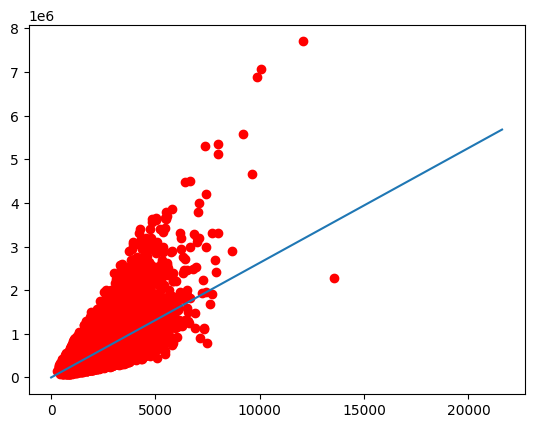

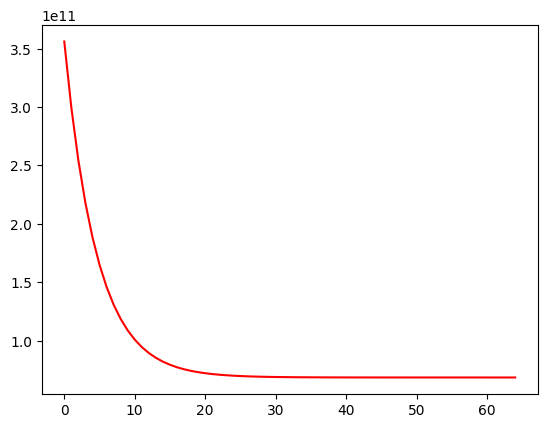

In [52]:

#Mandamos a llamar a la columnas de price y sqft living
X = data[:,5].reshape((-1,1))
y = data[:,2].reshape((-1,1))

#Imprimimos los valroes de X e Y
print("Precios: ", X)
print("Sqft_living", y)

# Calculamos el xmr visto en clase
Xr = np.hstack((np.ones_like(X), X))

#Se calcula nuesta theta inicial
theta_init = np.random.rand(Xr.shape[1], 1) 

#Le quitamos los valores nulos a nuestra theta inicial
theta_init = theta_init[~np.isnan(theta_init)]

# Le hacemos un reshape a nuestra theta inicial
theta_init = theta_init.reshape((len(theta_init), 1))

# Calculando el costo y el gradiente.
thetaf, costs = linear_regression(
    Xr,
    y,
    theta_init,
    cost,
    grad,
    a=0.00000001,
    n=65
)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

#Calculamos la pendiente que vamos a gráficar
ym = xmr @ thetaf 


# Gráfica.
plt.plot(X, y, "ro")
plt.plot(xm, ym)
plt.show()

#Gráfica de los costos
plt.plot(costs, color="red")
plt.show()



### Task 1.3 Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

Precios:  [[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
Sqft_living [[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


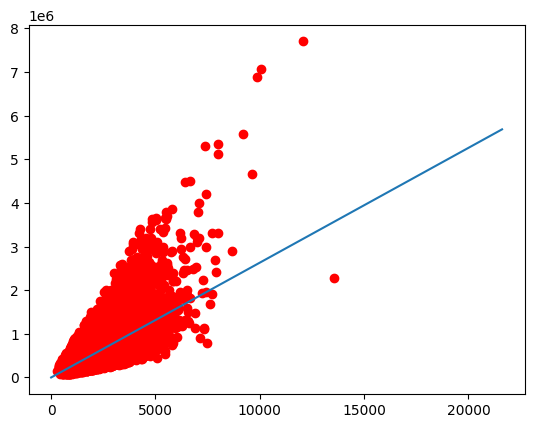

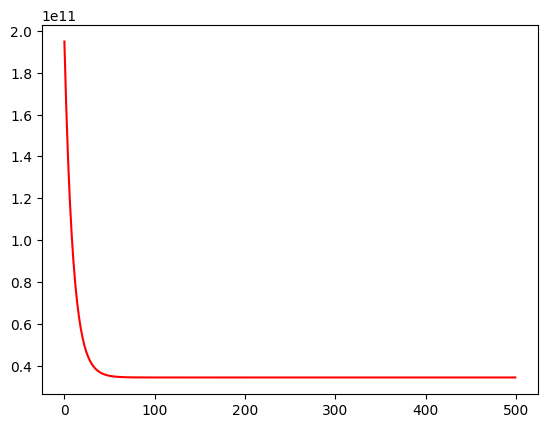

In [54]:
#Mandamos a llamar a la columnas de price y sqft living
X = data[:,5].reshape((-1,1))
y = data[:,2].reshape((-1,1))

#Imprimimos los valroes de X e Y
print("Precios: ", X)
print("Sqft_living", y)

# Calculamos el xmr visto en clase
Xr = np.hstack((np.ones_like(X), X))

#Se calcula nuesta theta inicial
theta_init = np.random.rand(Xr.shape[1], 1) 

#Le quitamos los valores nulos a nuestra theta inicial
theta_init = theta_init[~np.isnan(theta_init)]

# Le hacemos un reshape a nuestra theta inicial
theta_init = theta_init.reshape((len(theta_init), 1))

r_theta, costs, thetas = gradient_descent(
    theta_init,
    Xr,
    y,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.00000001,
    threshold=0.001,
    max_iter=500,
    grad = 1
)

xm = np.array([[0], [len(X)]])
#Calculamos nuestro xmr
xmr = np.concatenate((np.ones((2, 1)), xm), axis=1)

#Calculamos nuestra pendiente
ym = xmr @ r_theta

# Gráfica.
plt.plot(X, y, 'ro') #puntos
plt.plot(xm,ym) #regresion
plt.show()

#Gráfica de los costos
plt.plot(costs, color="red")
plt.show()




### Task 1.4 Usando cross validation determine el grado del polinomio